# Proyek Analisis Data: [Air Quality Dataset]
- **Nama:** [Rizki Rahman Maulana]
- **Email:** [mc253d5y0335@student.devacademy.id]
- **ID Dicoding:** [MC253D5Y0335]

## Menentukan Pertanyaan Bisnis

- Bagaimana tren kualitas udara (PM2.5, PM10, SO2, NO2, CO, O3) pada bagian pusat kota beijing (Antizhongxin, Dongsi) berubah dari waktu ke waktu?
- Apakah ada korelasi antara kondisi cuaca (suhu, tekanan, kelembaban, curah hujan) dan tingkat polusi udara?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import geopandas as gpd
import plotly.express as px
from shapely.geometry import Point
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Insight:**
- Mengimpor pustaka penting untuk analisis data dan visualisasi.
- Pandas untuk manipulasi data, Matplotlib dan Seaborn untuk visualisasi, serta NumPy untuk operasi numerik.


## Data Wrangling

### Gathering Data

In [2]:
local_zip = '/content/drive/MyDrive/Dataset/Air-quality-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

**Insight:**
- Mengekstrak zipfile dan memindahkannya ke lokal yang ada pada google collab

In [3]:
aotizhongxin_df = pd.read_csv('/content/PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv')
aotizhongxin_df.head()

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin

**Insight:**
- Memuat dataset aotizhongxin dari file CSV ke dalam DataFrame Pandas untuk analisis lebih lanjut.
- Data ini mengandung informasi tentang kualitas udara di dalam rentang waktu tertentu.


In [4]:
dongsin_df = pd.read_csv('/content/PRSA_Data_20130301-20170228/PRSA_Data_Dongsi_20130301-20170228.csv')
dongsin_df.head()

No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    9.0   9.0  3.0  17.0  300.0  89.0  -0.5   
1   2  2013      3    1     1    4.0   4.0  3.0  16.0  300.0  88.0  -0.7   
2   3  2013      3    1     2    7.0   7.0  NaN  17.0  300.0  60.0  -1.2   
3   4  2013      3    1     3    3.0   3.0  5.0  18.0    NaN   NaN  -1.4   
4   5  2013      3    1     4    3.0   3.0  7.0   NaN  200.0  84.0  -1.9   

     PRES  DEWP  RAIN   wd  WSPM station  
0  1024.5 -21.4   0.0  NNW   5.7  Dongsi  
1  1025.1 -22.1   0.0   NW   3.9  Dongsi  
2  1025.3 -24.6   0.0  NNW   5.3  Dongsi  
3  1026.2 -25.5   0.0    N   4.9  Dongsi  
4  1027.1 -24.5   0.0  NNW   3.2  Dongsi

**Insight:**
- Memuat dataset Dongsi dari file CSV ke dalam DataFrame Pandas untuk analisis lebih lanjut.
- Data ini mengandung informasi tentang kualitas udara di dalam rentang waktu tertentu.


### Assessing Data

#### Menilai Tabel `aotizhongxin_df`

In [5]:
aotizhongxin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


**Insight:**
- Menyajikan ringkasan dataset, termasuk jumlah baris, kolom, tipe data, dan nilai yang hilang.
- Dari sini, kita bisa mengetahui apakah ada kolom yang perlu ditangani sebelum analisis lebih lanjut.


In [6]:
aotizhongxin_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

**Insight:**
- Mengecek jumlah nilai yang hilang di setiap kolom dataset.
- Jika ada banyak nilai yang hilang, kita perlu memutuskan cara mengatasinya, baik secara imputasi atau penghapusan data.


In [7]:
print('Jumlah duplikasi: ', aotizhongxin_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Menjalankan proses analisis tentang jumlah file duplikasi untuk mendapatkan informasi yang lebih mendalam.


In [8]:
aotizhongxin_df.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34139.000000  34346.000000  34129.000000  34041.000000  33288.000000   
mean      82.773611    110.060391     17.375901     59.305833   1262.945145   
std       82.135694     95.223005     22.823017     37.116200   1221.436236   
min        3.000000      2.000000      0.285600      2.000000    100.000000   
25%       22.000000     38.000000      3.000000     30.000000    500.000000   
50%       58.000000     87.000000      9.000000     53.000000    900.000000   
75%      114.000000    155.000000     21.000000     82.000000   1500.000000   
max      898.000000    984.000000    341.000000    290.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  33345.000000  35044.000000  35044.000000  35044.000000  35044.000000   
mean      56.353358     13.584607   1011.846920      3.123062      0.067421   
std       57.916327     11.399097     10.404047     13.688896      0.910056   
min        0.214200    -16.800000    985.900000    -35.300000      0.000000   
25%        8.000000      3.100000   1003.300000     -8.100000      0.000000   
50%       42.000000     14.500000   1011.400000      3.800000      0.000000   
75%       82.000000     23.300000   1020.100000     15.600000      0.000000   
max      423.000000     40.500000   1042.000000     28.500000     72.500000   

               WSPM  
count  35050.000000  
mean       1.708496  
std        1.204071  
min        0.000000  
25%        0.900000  
50%        1.400000  
75%        2.200000  
max       11.200000

**Insight:**
- Menampilkan statistik deskriptif dari dataset seperti rata-rata, nilai minimum, maksimum, dan standar deviasi.
- Dapat membantu dalam memahami distribusi data serta menemukan kemungkinan anomali.


#### Menilai Tabel `dongsi_df`

In [9]:
dongsin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34314 non-null  float64
 6   PM10     34511 non-null  float64
 7   SO2      34401 non-null  float64
 8   NO2      33463 non-null  float64
 9   CO       31867 non-null  float64
 10  O3       34400 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


**Insight:**
- Menyajikan ringkasan dataset, termasuk jumlah baris, kolom, tipe data, dan nilai yang hilang.
- Dari sini, kita bisa mengetahui apakah ada kolom yang perlu ditangani sebelum analisis lebih lanjut.


In [10]:
dongsin_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       750
PM10        553
SO2         663
NO2        1601
CO         3197
O3          664
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

**Insight:**
- Mengecek jumlah nilai yang hilang di setiap kolom dataset.
- Jika ada banyak nilai yang hilang, kita perlu memutuskan cara mengatasinya, baik secara imputasi atau penghapusan data.


In [11]:
print('Jumlah duplikasi: ', dongsin_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Menjalankan proses analisis tentang jumlah file duplikasi untuk mendapatkan informasi yang lebih mendalam.


In [12]:
dongsin_df.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34314.000000  34511.000000  34401.000000  33463.000000  31867.000000   
mean      86.194297    110.336742     18.531107     53.699443   1330.069131   
std       86.575127     98.219860     22.905655     33.959230   1191.305887   
min        3.000000      2.000000      0.285600      2.000000    100.000000   
25%       22.000000     38.000000      4.000000     27.000000    600.000000   
50%       61.000000     86.000000     10.000000     47.000000   1000.000000   
75%      119.000000    151.000000     24.000000     73.000000   1700.000000   
max      737.000000    955.000000    300.000000    258.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  34400.000000  35044.000000  35044.000000  35044.000000  35044.000000   
mean      57.210637     13.671490   1012.547419      2.447535      0.064020   
std       58.033275     11.458418     10.266059     13.810696      0.786282   
min        0.642600    -16.800000    987.100000    -35.300000      0.000000   
25%       12.000000      3.100000   1004.000000     -8.800000      0.000000   
50%       44.125200     14.600000   1012.200000      3.000000      0.000000   
75%       81.000000     23.500000   1020.900000     15.000000      0.000000   
max     1071.000000     41.100000   1042.000000     28.800000     46.400000   

               WSPM  
count  35050.000000  
mean       1.860785  
std        1.280368  
min        0.000000  
25%        1.000000  
50%        1.500000  
75%        2.400000  
max       10.500000

**Insight:**
- Menampilkan statistik deskriptif dari dataset seperti rata-rata, nilai minimum, maksimum, dan standar deviasi.
- Dapat membantu dalam memahami distribusi data serta menemukan kemungkinan anomali.


### Cleaning Data

#### Membersihkan Tabel `aotizhongxin_df`

##### Missing Values

In [13]:
aotizhongxin_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

**Insight:**
- Mengecek jumlah nilai yang hilang di setiap kolom dataset.
- Jika ada banyak nilai yang hilang, kita perlu memutuskan cara mengatasinya, seperti imputasi atau penghapusan data.
- Untuk nilai numerik saya akan menggunakan rata-rata bukan penghapusan baris karena masih banyak nilai penting yang ada pada baris.
- Lalu untuk object saya akan menggunakan nilai terbanyak/modus agar tidak mengubah analisis data secara signifikan.

In [14]:
for col in aotizhongxin_df.columns:
    if pd.api.types.is_numeric_dtype(aotizhongxin_df[col]):
        aotizhongxin_df[col] = aotizhongxin_df[col].fillna(aotizhongxin_df[col].mean())


**Insight:**
- Mengatasi nilai yang hilang dalam dataset dengan menggantikannya menggunakan rata-rata.
- Pendekatan ini memastikan data tetap lengkap dan dapat digunakan dalam analisis.


In [15]:
aotizhongxin_df.isna().sum()

No          0
year        0
month       0
day         0
hour        0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd         81
WSPM        0
station     0
dtype: int64

**Insight:**
- Mengecek kembali jumlah nilai yang hilang di setiap kolom dataset untuk memastikan.


In [16]:
aotizhongxin_df[aotizhongxin_df.wd.isna()]

No  year  month  day  hour  PM2.5   PM10   SO2    NO2      CO  \
6388    6389  2013     11   22     4   82.0   74.0  15.0   75.0  1300.0   
11718  11719  2014      7    2     6   44.0   44.0   2.0   16.0   800.0   
13412  13413  2014      9   10    20   56.0  141.0  13.0   81.0   700.0   
16748  16749  2015      1   27    20   26.0   42.0  12.0   78.0  1300.0   
17263  17264  2015      2   18     7   13.0   14.0  12.0   22.0   600.0   
...      ...   ...    ...  ...   ...    ...    ...   ...    ...     ...   
34314  34315  2017      1   28    18  246.0  266.0  63.0   82.0   300.0   
34334  34335  2017      1   29    14   15.0   55.0   4.0    6.0   300.0   
34560  34561  2017      2    8     0  113.0  124.0  17.0  105.0  2600.0   
34638  34639  2017      2   11     6   15.0   24.0  16.0   71.0   600.0   
34746  34747  2017      2   15    18  269.0  269.0  51.0  129.0  3000.0   

               O3       TEMP        PRES       DEWP      RAIN   wd      WSPM  \
6388    56.353358  -3.200000  1020.50000  -4.000000  0.000000  NaN  0.100000   
11718  105.000000  21.500000   998.20000  21.500000  0.100000  NaN  0.200000   
13412   99.000000  21.700000  1008.00000  15.800000  0.000000  NaN  0.000000   
16748    2.000000  13.584607  1011.84692   3.123062  0.067421  NaN  1.708496   
17263   60.000000  13.584607  1011.84692   3.123062  0.067421  NaN  1.708496   
...           ...        ...         ...        ...       ...  ...       ...   
34314   51.000000   0.625000  1016.00000  -7.900000  0.000000  NaN  0.500000   
34334   80.000000  -1.220000  1025.00000 -21.600000  0.000000  NaN  6.500000   
34560    2.000000  -2.800000  1026.30000  -7.000000  0.000000  NaN  0.200000   
34638   25.000000  -4.600000  1025.00000 -18.100000  0.000000  NaN  0.200000   
34746   64.000000   4.100000  1011.50000  -5.900000  0.000000  NaN  0.000000   

            station  
6388   Aotizhongxin  
11718  Aotizhongxin  
13412  Aotizhongxin  
16748  Aotizhongxin  
17263  Aotizhongxin  
...             ...  
34314  Aotizhongxin  
34334  Aotizhongxin  
34560  Aotizhongxin  
34638  Aotizhongxin  
34746  Aotizhongxin  

[81 rows x 18 columns]

**Insight:**
- Menjalankan proses analisis untuk memastikan kembali dan mendapatkan informasi yang lebih mendalam.


In [17]:
aotizhongxin_df.wd.value_counts()

wd
NE     5140
ENE    3950
SW     3359
E      2608
NNE    2445
WSW    2212
SSW    2098
N      2066
NW     1860
ESE    1717
NNW    1589
SE     1341
S      1304
W      1171
WNW    1101
SSE    1022
Name: count, dtype: int64

**Insight:**
- Mengecek jumlah nilai/label yang ada pada kolom object, untuk mencari modus.

In [18]:
aotizhongxin_df.fillna(value='NE', inplace=True)

**Insight:**
- Mengisi nilai kosong pada object dengan modus yaitu 'NE'

In [19]:
aotizhongxin_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

**Insight:**
- Memastikan kembali bahwa semua data kosong sudah terisi atau belum.

#### Membersihkan Tabel `dongsi_df`

##### Missing Values

In [20]:
dongsin_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       750
PM10        553
SO2         663
NO2        1601
CO         3197
O3          664
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

**Insight:**
- Mengecek jumlah nilai yang hilang di setiap kolom dataset.
- Jika ada banyak nilai yang hilang, kita perlu memutuskan cara mengatasinya, seperti imputasi atau penghapusan data.
- Untuk nilai numerik saya akan menggunakan rata-rata bukan penghapusan baris karena masih banyak nilai penting yang ada pada baris.
- Lalu untuk object saya akan menggunakan nilai terbanyak/modus agar tidak mengubah analisis data secara signifikan.

In [21]:
for col in dongsin_df.columns:
    if pd.api.types.is_numeric_dtype(dongsin_df[col]):
        dongsin_df[col] = dongsin_df[col].fillna(dongsin_df[col].mean())


**Insight:**
- Mengatasi nilai yang hilang dalam dataset dengan menggantikannya menggunakan rata-rata.
- Pendekatan ini memastikan data tetap lengkap dan dapat digunakan dalam analisis.


In [22]:
dongsin_df.isna().sum()

No          0
year        0
month       0
day         0
hour        0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd         78
WSPM        0
station     0
dtype: int64

**Insight:**
- Mengecek kembali jumlah nilai yang hilang di setiap kolom dataset untuk memastikan.


In [23]:
dongsin_df[dongsin_df.wd.isna()]

No  year  month  day  hour  PM2.5   PM10   SO2    NO2      CO    O3  \
16748  16749  2015      1   27    20   35.0   50.0  14.0   66.0  1000.0   2.0   
17263  17264  2015      2   18     7   12.0   12.0   8.0   24.0   400.0  50.0   
20853  20854  2015      7   17    21   89.0  111.0   4.0   72.0  1700.0  56.0   
23035  23036  2015     10   16    19  295.0  318.0  40.0  177.0  2700.0  57.0   
23059  23060  2015     10   17    19  357.0  375.0  22.0  215.0  3500.0   5.0   
...      ...   ...    ...  ...   ...    ...    ...   ...    ...     ...   ...   
34314  34315  2017      1   28    18  258.0  350.0  58.0   79.0  3100.0   4.0   
34334  34335  2017      1   29    14   15.0   68.0   3.0    8.0   300.0  67.0   
34560  34561  2017      2    8     0  121.0  146.0  22.0   78.0  2300.0   6.0   
34638  34639  2017      2   11     6   19.0   19.0  10.0   67.0  1100.0   5.0   
34746  34747  2017      2   15    18  262.0  262.0  45.0  104.0  3000.0  44.0   

           TEMP         PRES       DEWP     RAIN   wd      WSPM station  
16748  13.67149  1012.547419   2.447535  0.06402  NaN  1.860785  Dongsi  
17263  13.67149  1012.547419   2.447535  0.06402  NaN  1.860785  Dongsi  
20853  23.70000  1002.300000  21.600000  0.00000  NaN  0.100000  Dongsi  
23035  16.70000  1012.600000  12.600000  0.00000  NaN  0.200000  Dongsi  
23059  16.00000  1013.600000  13.300000  0.00000  NaN  0.100000  Dongsi  
...         ...          ...        ...      ...  ...       ...     ...  
34314   0.62500  1016.000000  -7.900000  0.00000  NaN  0.500000  Dongsi  
34334  -1.22000  1025.000000 -21.600000  0.00000  NaN  6.500000  Dongsi  
34560  -2.80000  1026.300000  -7.000000  0.00000  NaN  0.200000  Dongsi  
34638  -4.60000  1025.000000 -18.100000  0.00000  NaN  0.200000  Dongsi  
34746   4.10000  1011.500000  -5.900000  0.00000  NaN  0.000000  Dongsi  

[78 rows x 18 columns]

**Insight:**
- Menjalankan proses analisis untuk memastikan kembali dan mendapatkan informasi yang lebih mendalam.


In [24]:
dongsin_df.wd.value_counts()

wd
ENE    3861
E      3564
NE     3540
ESE    2706
SW     2481
NW     2466
SSW    1953
NNE    1928
SE     1880
N      1865
WSW    1769
NNW    1693
S      1547
SSE    1402
WNW    1347
W       984
Name: count, dtype: int64

**Insight:**
- Mengecek jumlah nilai/label yang ada pada kolom object, untuk mencari modus.

In [25]:
dongsin_df.fillna(value='ENE', inplace=True)

**Insight:**
- Mengisi nilai kosong dengan modus yaitu nilai 'ENE'.

In [26]:
dongsin_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

**Insight:**
- Memastikan kembali bahwa semua data kosong sudah terisi atau belum.

## Exploratory Data Analysis (EDA)

### Explore `aotizhongxin_df`

In [27]:
aotizhongxin_df.sample(5)

No  year  month  day  hour  PM2.5   PM10   SO2         NO2  \
20186  20187  2015      6   20     2   33.0   62.0   2.0   95.000000   
25515  25516  2016      1   28     3  200.0  203.0  85.0   59.305833   
20286  20287  2015      6   24     6  104.0  109.0  14.0   26.000000   
25076  25077  2016      1    9    20  115.0  149.0  36.0  125.000000   
10502  10503  2014      5   12    14   24.0   44.0   6.0   27.000000   

                CO     O3  TEMP    PRES  DEWP  RAIN   wd  WSPM       station  
20186   800.000000    2.0  17.1  1008.1  16.0   0.0   NW   0.2  Aotizhongxin  
25515  1262.945145   13.0  -6.4  1024.4 -15.6   0.0  ENE   1.0  Aotizhongxin  
20286   800.000000   86.0  24.5  1001.7  17.2   0.0   SW   1.9  Aotizhongxin  
25076  2400.000000    7.0   0.6  1020.8 -13.9   0.0    W   1.8  Aotizhongxin  
10502   300.000000  125.0  29.0   994.1  10.2   0.0   SW   4.3  Aotizhongxin

**Insight:**
- Mencoba melihat 5 sample data random untuk mengetahui struktur data dari aotizhongxin.

In [28]:
aotizhongxin_df.describe(include='all')

No          year         month           day          hour  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    17532.500000   2014.662560      6.522930     15.729637     11.500000   
std     10122.249256      1.177213      3.448752      8.800218      6.922285   
min         1.000000   2013.000000      1.000000      1.000000      0.000000   
25%      8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%     17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%     26298.250000   2016.000000     10.000000     23.000000     17.250000   
max     35064.000000   2017.000000     12.000000     31.000000     23.000000   

               PM2.5          PM10           SO2           NO2            CO  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       82.773611    110.060391     17.375901     59.305833   1262.945145   
std        81.045038     94.243001     22.516658     36.570739   1190.100376   
min         3.000000      2.000000      0.285600      2.000000    100.000000   
25%        23.000000     39.000000      3.000000     31.000000    500.000000   
50%        61.000000     89.000000      9.000000     55.000000    900.000000   
75%       112.000000    153.000000     21.000000     81.000000   1500.000000   
max       898.000000    984.000000    341.000000    290.000000  10000.000000   

                  O3          TEMP          PRES          DEWP          RAIN  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       56.353358     13.584607   1011.846920      3.123062      0.067421   
std        56.478782     11.395845     10.401079     13.684991      0.909796   
min         0.214200    -16.800000    985.900000    -35.300000      0.000000   
25%         9.000000      3.100000   1003.300000     -8.100000      0.000000   
50%        46.000000     14.500000   1011.400000      3.800000      0.000000   
75%        80.000000     23.300000   1020.100000     15.600000      0.000000   
max       423.000000     40.500000   1042.000000     28.500000     72.500000   

           wd          WSPM       station  
count   35064  35064.000000         35064  
unique     16           NaN             1  
top        NE           NaN  Aotizhongxin  
freq     5221           NaN         35064  
mean      NaN      1.708496           NaN  
std       NaN      1.203831           NaN  
min       NaN      0.000000           NaN  
25%       NaN      0.900000           NaN  
50%       NaN      1.400000           NaN  
75%       NaN      2.200000           NaN  
max       NaN     11.200000           NaN

**Insight:**
- Melakukan analisis mendalam terhadap dataset untuk mengetahui nilai dari setiap kolom berupa nilai min,max,mean,dll.
- Ini dilakukan untuk mengecek kira-kira apakah ada data anomali yang ada pada dataset.

In [29]:
aotizhongxin_df.groupby(by="year").agg({
    "No" : "nunique",
    "PM2.5" : ["max", "min", "mean", "std"]
})

No  PM2.5                            
     nunique    max  min       mean         std
year                                           
2013    7344  665.0  3.0  82.393043   73.615581
2014    8760  584.0  3.0  90.333581   80.546945
2015    8760  657.0  3.0  82.134578   84.553837
2016    8784  898.0  3.0  74.279022   76.406974
2017    1416  713.0  3.0  94.626679  114.185700

**Insight:**
- Mencoba secara spesifik untuk mengetahui korelasi nilai PM2.5 dengan rentang tahun.
- Nilai yang dilihat adalah nilai mean, max, min, dan std PM2.5 dari tahun ketahun.

In [30]:
aotizhongxin_df.groupby(by="year").agg({
    "No" : "nunique",
    "PM10" : ["max", "min", "mean", "std"]
})

No   PM10                             
     nunique    max  min        mean         std
year                                            
2013    7344  844.0  2.0  112.913167   84.444642
2014    8760  948.0  3.0  121.389921   97.732866
2015    8760  984.0  3.0  112.035381   99.496291
2016    8784  884.0  4.0   94.842749   86.545418
2017    1416  858.0  3.0  107.357984  117.802626

**Insight:**
- Sama halnya dengan sebelumnya, disini secara spesifik untuk mengetahui korelasi nilai PM10 dengan rentang tahun.
- Nilai yang dilihat adalah nilai mean, max, min, dan std PM10 dari tahun ketahun.

In [31]:
aotizhongxin_df.groupby(by="PM2.5").hour.nunique().sort_values(ascending=False)

PM2.5
3.0      24
98.0     24
96.0     24
94.0     24
93.0     24
         ..
387.0     1
480.0     1
479.0     1
478.0     1
898.0     1
Name: hour, Length: 546, dtype: int64

**Insight:**
- Melihat kualitas udara berdasarkan indikator PM2.5 dari jam ke jam
- Hal ini bisa jadi acuan untuk mengetahui kira-kira jam berapa saja indikator polusi udara tertinggi yang bisa menjadi pertimbangan seseorang untuk beraktifitas diluar rumah

In [32]:
hourly_averages = aotizhongxin_df.groupby('hour')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()

max_mean_hours = {}
for col in ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']:
  max_mean_hours[col] = hourly_averages[col].idxmax()

print("Hourly averages:\n", hourly_averages)
print("\nHour with the maximum mean for each pollutant:")
for pollutant, hour in max_mean_hours.items():
  max_mean_value = hourly_averages.loc[hour, pollutant]
  print(f"{pollutant}: Hour {hour} with value {max_mean_value}")


Hourly averages:
           PM2.5        PM10        SO2        NO2           CO          O3
hour                                                                      
0     92.099235  124.350027  18.150487  71.550544  1433.198032   39.501768
1     91.865678  123.402581  18.319496  70.408775  1458.986608   35.625939
2     91.491893  120.106222  17.335699  66.809055  1436.846940   32.529460
3     88.581518  114.429317  16.477107  65.017039  1349.519521   30.918985
4     85.278254  109.071301  15.557941  64.175618  1311.214618   33.751350
5     81.751254  103.495763  14.872624  61.923385  1292.133692   26.693346
6     79.837240  100.584797  14.785181  61.374384  1294.503949   25.433676
7     77.673445   98.930274  15.098653  61.428828  1315.359603   24.640175
8     77.855941  101.430876  16.612445  61.592626  1334.580843   26.642686
9     78.644881  103.663033  18.877241  58.985241  1331.317663   33.507320
10    79.313291  103.386032  20.180924  55.537759  1300.932694   44.829502
11    7

**Insight:**
- Mengecek indikator udara(PM2.5, PM10, SO2, NO2, CO, O3,) tertinggi dari kolom hour.
- Hal ini dilakukan untuk mengetahui rentang jam berapa saja polusi tertinggi
- Dari hasil diatas terlihat bahwa rentang jam 22 malam - 1 dinihari terlihat beberapa indikator (PM2.5, PM10, NO2, CO) berada di titik tertinggi. Yang menunjukkan bahwa pada daerah Aotizhongxin banyak beraktifitas pada malam hari mungkin seperti kegiatan night market atau hiburan malam. Selain itu juga, pada jam tersebut komponen polusi udara terperangkap didaratan dan tidak terserap oleh pepohonan dikarenakan pohon dapat menyerap polusi pada pagi hari dengan bantuan sinar matahari.

### Explore `dongsin_df`

In [33]:
dongsin_df.sample(5)

No  year  month  day  hour  PM2.5   PM10   SO2    NO2      CO  \
11919  11920  2014      7   10    15   28.0   28.0   8.0   28.0   500.0   
28432  28433  2016      5   28    16   41.0   67.0  11.0   16.0   800.0   
14923  14924  2014     11   12    19    3.0   67.0   2.0   14.0   300.0   
5884    5885  2013     11    1     4  262.0  289.0  13.0  139.0  2300.0   
23541  23542  2015     11    6    21   18.0   18.0   2.0   36.0   500.0   

            O3  TEMP    PRES  DEWP  RAIN   wd  WSPM station  
11919  219.000  36.2   994.0  13.0   0.0  SSW   2.2  Dongsi  
28432  193.000  29.6   999.0   8.1   0.0   SW   3.7  Dongsi  
14923   66.000   6.0  1023.0 -17.3   0.0   NW   2.5  Dongsi  
5884     7.497   4.3  1023.2   3.9   0.0    N   0.4  Dongsi  
23541   30.000   1.6  1026.1  -0.5   0.0   NE   3.8  Dongsi

**Insight:**
- Mencoba melihat 5 sample data random untuk mengetahui struktur data dari Dongsi.

In [34]:
dongsin_df.describe(include='all')

No          year         month           day          hour  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    17532.500000   2014.662560      6.522930     15.729637     11.500000   
std     10122.249256      1.177213      3.448752      8.800218      6.922285   
min         1.000000   2013.000000      1.000000      1.000000      0.000000   
25%      8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%     17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%     26298.250000   2016.000000     10.000000     23.000000     17.250000   
max     35064.000000   2017.000000     12.000000     31.000000     23.000000   

               PM2.5          PM10           SO2           NO2            CO  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       86.194297    110.336742     18.531107     53.699443   1330.069131   
std        85.644198     97.442239     22.688062     33.174871   1135.697130   
min         3.000000      2.000000      0.285600      2.000000    100.000000   
25%        23.000000     38.000000      4.000000     28.000000    600.000000   
50%        63.000000     88.000000     10.000000     49.000000   1100.000000   
75%       117.000000    150.000000     24.000000     72.000000   1600.000000   
max       737.000000    955.000000    300.000000    258.000000  10000.000000   

                  O3         TEMP          PRES          DEWP          RAIN  \
count   35064.000000  35064.00000  35064.000000  35064.000000  35064.000000   
unique           NaN          NaN           NaN           NaN           NaN   
top              NaN          NaN           NaN           NaN           NaN   
freq             NaN          NaN           NaN           NaN           NaN   
mean       57.210637     13.67149   1012.547419      2.447535      0.064020   
std        57.481150     11.45515     10.263131     13.806757      0.786058   
min         0.642600    -16.80000    987.100000    -35.300000      0.000000   
25%        13.000000      3.10000   1004.000000     -8.800000      0.000000   
50%        46.000000     14.60000   1012.200000      3.000000      0.000000   
75%        80.000000     23.50000   1020.900000     15.000000      0.000000   
max      1071.000000     41.10000   1042.000000     28.800000     46.400000   

           wd          WSPM station  
count   35064  35064.000000   35064  
unique     16           NaN       1  
top       ENE           NaN  Dongsi  
freq     3939           NaN   35064  
mean      NaN      1.860785     NaN  
std       NaN      1.280113     NaN  
min       NaN      0.000000     NaN  
25%       NaN      1.000000     NaN  
50%       NaN      1.500000     NaN  
75%       NaN      2.400000     NaN  
max       NaN     10.500000     NaN

**Insight:**
- Melakukan analisis mendalam terhadap dataset untuk mengetahui nilai dari setiap kolom berupa nilai min,max,mean,dll.
- Ini dilakukan untuk mengecek kira-kira apakah ada data anomali yang ada pada dataset.

In [35]:
dongsin_df.groupby(by="year").agg({
    "No" : "nunique",
    "PM2.5" : ["max", "min", "mean", "std"]
})

No  PM2.5                             
     nunique    max  min        mean         std
year                                            
2013    7344  520.0  3.0   86.925760   76.020918
2014    8760  737.0  3.0   87.455485   83.611213
2015    8760  685.0  3.0   87.326436   91.716622
2016    8784  695.0  3.0   80.465800   81.283620
2017    1416  681.0  3.0  103.130529  122.061700

**Insight:**
- Mencoba secara spesifik untuk mengetahui korelasi nilai PM2.5 dengan rentang tahun.
- Nilai yang dilihat adalah nilai mean, max, min, dan std PM2.5 dari tahun ketahun.

In [36]:
dongsin_df.groupby(by="year").agg({
    "No" : "nunique",
    "PM10" : ["max", "min", "mean", "std"]
})

No   PM10                             
     nunique    max  min        mean         std
year                                            
2013    7344  602.0  2.0  105.018146   80.618013
2014    8760  794.0  3.0  116.939118   98.201290
2015    8760  816.0  3.0  111.840239  102.046496
2016    8784  891.0  5.0  103.282334   94.810885
2017    1416  955.0  5.0  131.536060  142.876649

**Insight:**
- Sama halnya dengan sebelumnya, disini secara spesifik untuk mengetahui korelasi nilai PM10 dengan rentang tahun.
- Nilai yang dilihat adalah nilai mean, max, min, dan std PM10 dari tahun ketahun.

In [37]:
dongsin_df.groupby(by="PM2.5").hour.nunique().sort_values(ascending=False)

PM2.5
3.0      24
80.0     24
4.0      24
92.0     24
91.0     24
         ..
500.0     1
499.0     1
496.0     1
376.0     1
737.0     1
Name: hour, Length: 583, dtype: int64

**Insight:**
- Melihat kualitas udara berdasarkan indikator PM2.5 dari jam ke jam
- Hal ini bisa jadi acuan untuk mengetahui kira-kira jam berapa saja indikator polusi udara tertinggi yang bisa menjadi pertimbangan seseorang untuk beraktifitas diluar rumah

In [38]:
hourly_averages = dongsin_df.groupby('hour')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()

max_mean_hours = {}
for col in ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']:
  max_mean_hours[col] = hourly_averages[col].idxmax()

print("Hourly averages:\n", hourly_averages)
print("\nHour with the maximum mean for each pollutant:")
for pollutant, hour in max_mean_hours.items():
  max_mean_value = hourly_averages.loc[hour, pollutant]
  print(f"{pollutant}: Hour {hour} with value {max_mean_value}")


Hourly averages:
           PM2.5        PM10        SO2        NO2           CO          O3
hour                                                                      
0     96.944408  124.497185  19.009088  63.262379  1478.929208   43.674057
1     96.449602  121.676522  19.380764  62.266629  1484.686081   39.305963
2     94.900522  118.950238  18.981928  61.331520  1487.251000   33.207475
3     92.505644  114.242424  18.993811  60.664653  1334.468993   29.515105
4     89.114474  108.771208  18.441306  59.402560  1272.691298   31.355788
5     85.188198  103.779422  17.606706  57.298641  1390.667979   28.437321
6     82.360348  102.352540  17.079637  57.260856  1409.230324   27.021312
7     80.403188  101.576659  17.376033  58.149591  1427.608384   26.147041
8     80.006002  102.737370  18.119556  58.561526  1440.085502   28.211192
9     79.685449  102.504268  19.198772  55.712970  1396.733782   35.604629
10    79.814313  101.989310  20.235329  52.511274  1344.371490   46.084589
11    8

**Insight:**
- Mengecek indikator udara(PM2.5, PM10, SO2, NO2, CO, O3,) tertinggi dari kolom hour.
- Hal ini dilakukan untuk mengetahui rentang jam berapa saja polusi tertinggi
- Dari hasil diatas terlihat bahwa rentang jam 21 malam sampai 23 malam terlihat beberapa indikator (PM2.5, PM10, NO2, CO) berada di titik tertinggi. Yang menunjukkan bahwa pada daerah Dongsi banyak beraktifitas pada malam hari mungkin seperti kegiatan night market atau hiburan malam. Selain itu juga, pada jam tersebut komponen polusi udara terperangkap didaratan dan tidak terserap oleh pepohonan dikarenakan pohon dapat menyerap polusi pada pagi hari dengan bantuan sinar matahari.
- Sama seperti yang terjadi pada Aotizhongxin

### Explore `aotizhongxin_df` dan `dongsin_df`

#### Menggabungkan data `aotizhongxin_df` dan `dongsin_df`

In [39]:
# Gabungkan dataframe
combined_df = pd.concat([aotizhongxin_df, dongsin_df], ignore_index=True)

**Insight:**
- Menggabungkan beberapa dataset menjadi satu untuk analisis yang lebih komprehensif.
- Hal ini memungkinkan kita untuk membandingkan data dari berbagai sumber dalam satu analisis.


In [40]:
combined_df

No  year  month  day  hour  PM2.5  PM10   SO2   NO2      CO    O3  \
0          1  2013      3    1     0    4.0   4.0   4.0   7.0   300.0  77.0   
1          2  2013      3    1     1    8.0   8.0   4.0   7.0   300.0  77.0   
2          3  2013      3    1     2    7.0   7.0   5.0  10.0   300.0  73.0   
3          4  2013      3    1     3    6.0   6.0  11.0  11.0   300.0  72.0   
4          5  2013      3    1     4    3.0   3.0  12.0  12.0   300.0  72.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...     ...   ...   
70123  35060  2017      2   28    19   16.0  51.0   3.0  29.0   400.0  73.0   
70124  35061  2017      2   28    20   18.0  45.0   3.0  43.0   500.0  54.0   
70125  35062  2017      2   28    21   23.0  58.0   5.0  61.0   700.0  28.0   
70126  35063  2017      2   28    22   23.0  53.0   9.0  75.0   900.0  15.0   
70127  35064  2017      2   28    23   30.0  71.0  11.0  87.0  1200.0   4.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM       station  
0      -0.7  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1      -1.1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2      -1.1  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3      -1.4  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4      -2.0  1025.2 -19.5   0.0    N   2.0  Aotizhongxin  
...     ...     ...   ...   ...  ...   ...           ...  
70123  12.5  1013.5 -16.2   0.0   NW   2.4        Dongsi  
70124  11.6  1013.6 -15.1   0.0  WNW   0.9        Dongsi  
70125  10.8  1014.2 -13.3   0.0   NW   1.1        Dongsi  
70126  10.5  1014.4 -12.9   0.0  NNW   1.2        Dongsi  
70127   8.6  1014.1 -15.9   0.0  NNE   1.3        Dongsi  

[70128 rows x 18 columns]

**Insight:**
- Menjalankan proses analisis atau manipulasi data untuk mendapatkan informasi yang lebih mendalam.


## Visualization & Explanatory Analysis

### Bagaimana tren kualitas udara (PM2.5, PM10, SO2, NO2, CO, O3) pada bagian pusat kota beijing (Antizhongxin, Dongsi) berubah dari waktu ke waktu?

In [41]:
yearly_data_aotizhongxin = aotizhongxin_df.groupby('year')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()
yearly_data_dongsin = dongsin_df.groupby('year')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()

# Display the yearly aggregated data for both locations
print("Yearly Aggregated Data for Aotizhongxin:\n", yearly_data_aotizhongxin)
print("\nYearly Aggregated Data for Dongsi:\n", yearly_data_dongsin)


Yearly Aggregated Data for Aotizhongxin:
           PM2.5        PM10        SO2        NO2           CO         O3
year                                                                     
2013  82.393043  112.913167  23.493029  63.390231  1187.527588  50.221417
2014  90.333581  121.389921  21.097476  63.742087  1194.545994  49.941810
2015  82.134578  112.035381  14.407922  60.937350  1395.649081  63.748528
2016  74.279022   94.842749  10.959400  48.725888  1196.488727  61.914457
2017  94.626679  107.357984  20.791767  66.215968  1668.531169  47.573536

Yearly Aggregated Data for Dongsi:
            PM2.5        PM10        SO2        NO2           CO         O3
year                                                                      
2013   86.925760  105.018146  23.917829  57.598815  1335.308738  63.489913
2014   87.455485  116.939118  23.790487  55.582203  1367.693735  57.245953
2015   87.326436  111.840239  15.218665  50.372735  1335.668400  55.796035
2016   80.465800  103.282334

**Insight:**
- Mengelompokkan data berdasarkan kategori tertentu, seperti tahun atau lokasi, untuk analisis tren.
- Ini berguna untuk melihat bagaimana kualitas udara berubah dari waktu ke waktu.


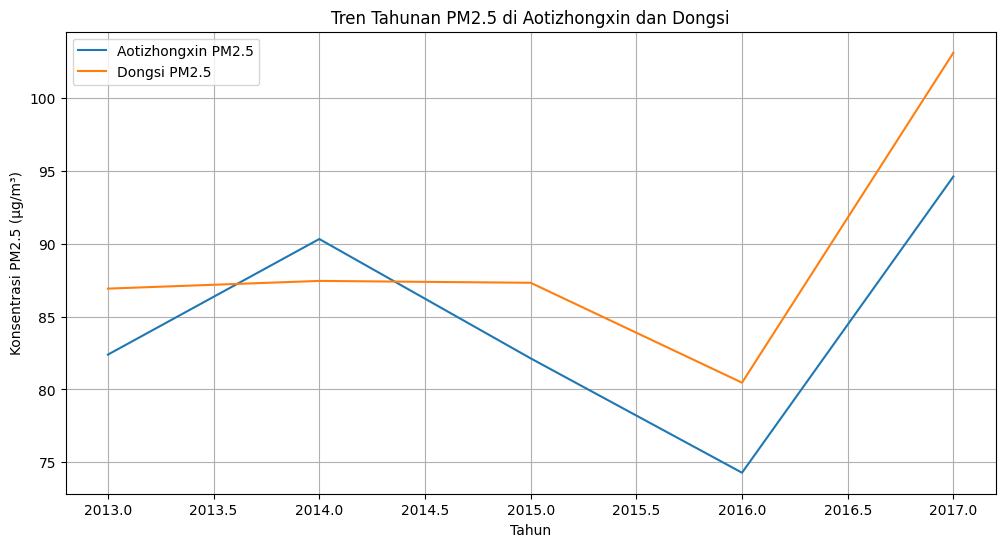

In [42]:
plt.figure(figsize=(12, 6))
plt.plot(yearly_data_aotizhongxin.index, yearly_data_aotizhongxin['PM2.5'], label='Aotizhongxin PM2.5')
plt.plot(yearly_data_dongsin.index, yearly_data_dongsin['PM2.5'], label='Dongsi PM2.5')
plt.xlabel('Tahun')
plt.ylabel('Konsentrasi PM2.5 (µg/m³)')
plt.title('Tren Tahunan PM2.5 di Aotizhongxin dan Dongsi')
plt.legend()
plt.grid()
plt.show()

**Insight:**
- Membuat visualisasi data untuk mengidentifikasi pola atau hubungan antar variabel.
- Grafik yang dihasilkan dapat membantu dalam memahami tren dan korelasi dalam dataset.
- Terlihat pada tahun 2014 PM2.5 untuk AOtizhongxin berada di titik lebih tinggi dari Dongsi untuk pertamakalinya.

In [43]:
monthly_data_aotizhongxin = aotizhongxin_df.groupby('month')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()
monthly_data_dongsin = dongsin_df.groupby('month')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()

# Display the monthly aggregated data for both locations
print("Monthly Aggregated Data for Aotizhongxin:\n", monthly_data_aotizhongxin)
print("\nm\Monthly Aggregated Data for Dongsi:\n", monthly_data_dongsin)


Monthly Aggregated Data for Aotizhongxin:
             PM2.5        PM10        SO2        NO2           CO         O3
month                                                                      
1       92.732675  113.883041  34.788355  65.989555  1946.694215  27.507043
2       85.789754  104.198207  30.963974  53.742529  1438.642713  44.065822
3       99.698396  149.935663  31.560548  63.382581  1371.332015  47.826121
4       76.495844  130.476657  16.432616  53.039104   868.469128  65.064639
5       67.454173  115.555446  16.068538  48.960845   802.230237  88.404708
6       72.029357   87.055712   8.511046  49.536572   949.274691  94.122262
7       75.370569   85.511982   5.943801  48.224902   841.318772  95.551312
8       56.259276   72.404673   4.578948  48.844430   817.601447  84.896939
9       64.710502   87.373734   7.341241  59.397238   922.123919  52.039146
10      96.225832  119.123390  10.815526  74.165288  1189.255203  28.457867
11      98.369994  123.789481  15.907802  72.

**Insight:**
- Mengelompokkan data berdasarkan kategori bulan untuk analisis tren.
- Ini juga berguna untuk melihat bagaimana kualitas udara berubah dari waktu ke waktu.


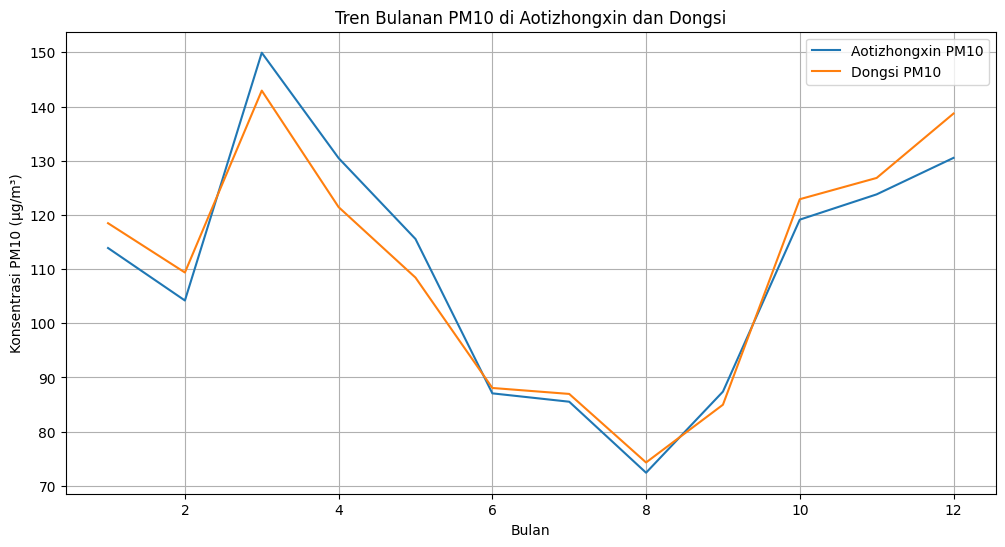

In [44]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_data_aotizhongxin.index, monthly_data_aotizhongxin['PM10'], label='Aotizhongxin PM10')
plt.plot(monthly_data_dongsin.index, monthly_data_dongsin['PM10'], label='Dongsi PM10')
plt.xlabel('Bulan')
plt.ylabel('Konsentrasi PM10 (µg/m³)')
plt.title('Tren Bulanan PM10 di Aotizhongxin dan Dongsi')
plt.legend()
plt.grid()
plt.show()

**Insight:**
- Membuat visualisasi data untuk mengidentifikasi pola atau hubungan antar variabel.
- Grafik yang dihasilkan dapat membantu dalam memahami tren dan korelasi dalam dataset.
- Untuk grafik diatas kedua dataset saling mengikuti yang menunjukkan PM10 kedua tempat tidak jauh beda untuk tren bulanannya.

In [45]:
daily_data_aotizhongxin = aotizhongxin_df.groupby('day')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()
daily_data_dongsin = dongsin_df.groupby('day')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()

# Display the daily aggregated data for both locations
print("Daily Aggregated Data for Aotizhongxin:\n", daily_data_aotizhongxin)
print("\nm\Daily Aggregated Data for Dongsi:\n", daily_data_dongsin)


Daily Aggregated Data for Aotizhongxin:
          PM2.5        PM10        SO2        NO2           CO         O3
day                                                                     
1    90.470927  113.925474  15.053873  59.120315  1254.240865  53.388991
2    75.060679   93.564724  18.128326  57.484180  1243.863382  53.400507
3    86.846568  115.782642  19.123989  59.809696  1402.868268  57.454095
4    93.991598  117.620712  17.101710  61.725678  1539.550025  58.759832
5    79.000164  104.116739  15.995030  55.068252  1248.897342  62.028387
6    89.470929  113.793059  19.220735  57.899153  1385.877864  58.053479
7    88.384090  110.848061  18.994010  58.472611  1401.358434  55.370616
8    85.181784  107.794585  18.974159  55.923262  1234.437808  58.581033
9    73.972010   99.682158  16.146371  56.076800  1146.710769  55.716379
10   65.201824   93.567663  16.333218  54.293542  1092.488939  55.599613
11   69.459726   91.204308  18.082235  55.314731  1145.798596  55.338293
12   63.71

**Insight:**
- Mengelompokkan data berdasarkan kategori bulan untuk analisis tren.
- Ini juga berguna untuk melihat bagaimana kualitas udara berubah dari waktu ke waktu.


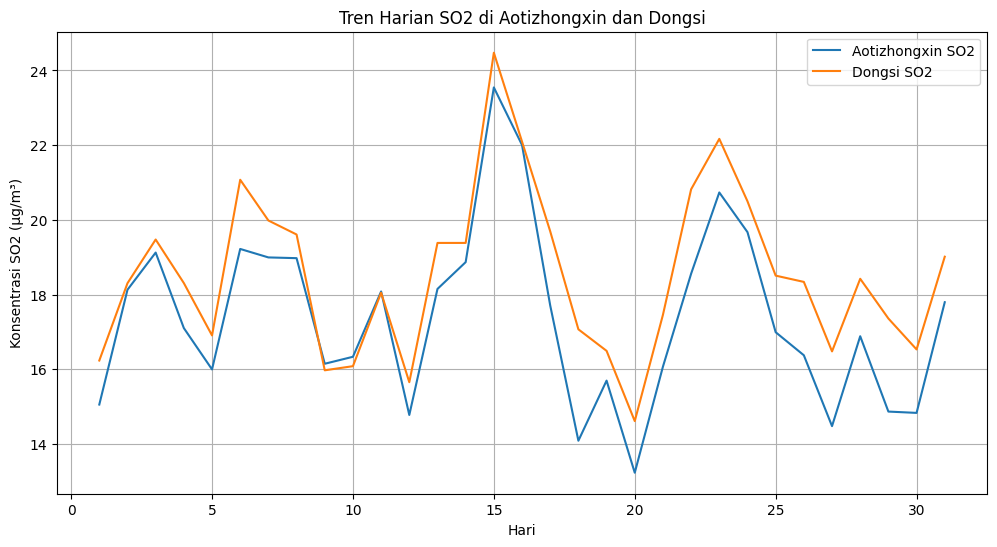

In [46]:
plt.figure(figsize=(12, 6))
plt.plot(daily_data_aotizhongxin.index, daily_data_aotizhongxin['SO2'], label='Aotizhongxin SO2')
plt.plot(daily_data_dongsin.index, daily_data_dongsin['SO2'], label='Dongsi SO2')
plt.xlabel('Hari')
plt.ylabel('Konsentrasi SO2 (µg/m³)')
plt.title('Tren Harian SO2 di Aotizhongxin dan Dongsi')
plt.legend()
plt.grid()
plt.show()

**Insight:**
- Membuat visualisasi data untuk mengidentifikasi pola atau hubungan antar variabel.
- Grafik yang dihasilkan dapat membantu dalam memahami tren dan korelasi dalam dataset.


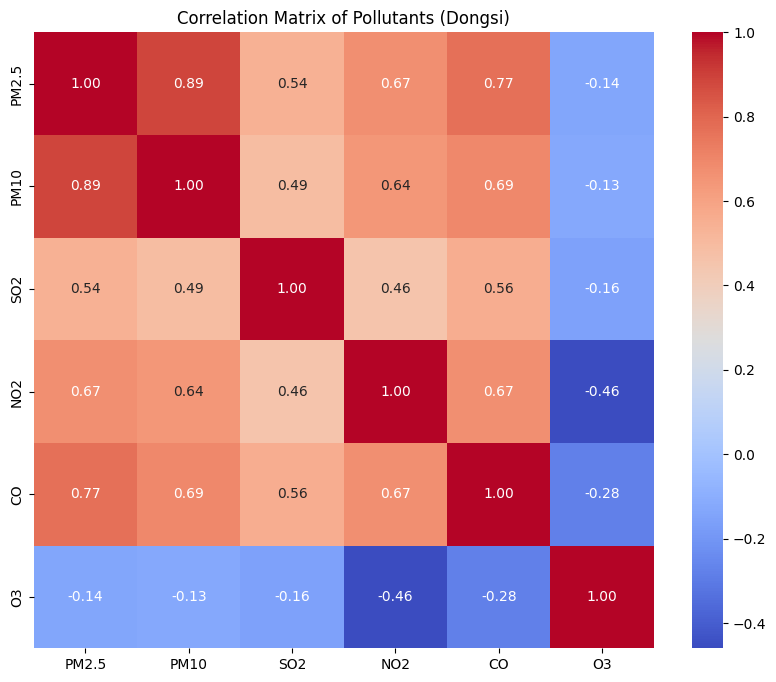

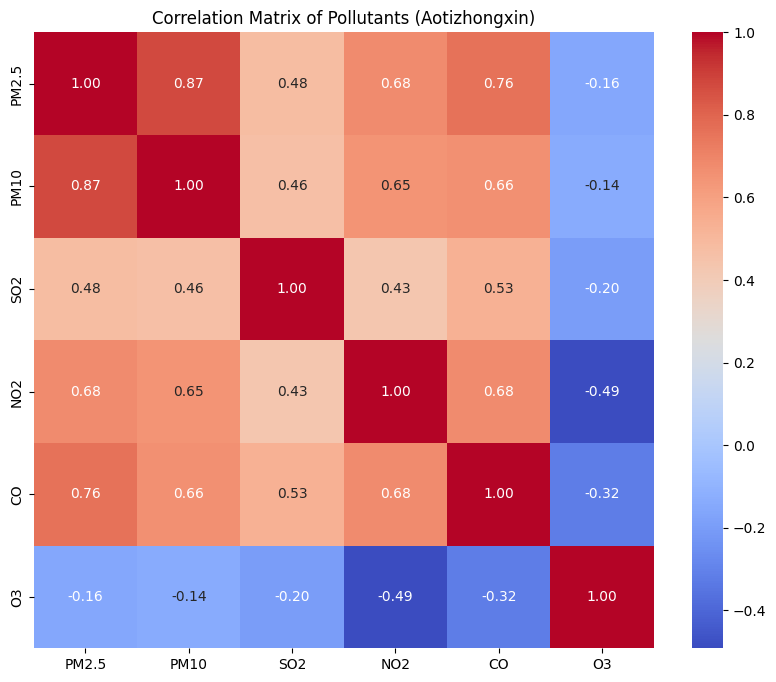

In [47]:
# Calculate the correlation matrix
correlation_matrix = dongsin_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Pollutants (Dongsi)')
plt.show()

# Calculate the correlation matrix for aotizhongxin_df
correlation_matrix_aotizhongxin = aotizhongxin_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].corr()

# Create the heatmap for aotizhongxin_df
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_aotizhongxin, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Pollutants (Aotizhongxin)')
plt.show()


**Insight:**
- Membuat visualisasi data untuk mengidentifikasi pola atau hubungan antar variabel.
- Ini untuk mengetahui hubungan atau korelasi antar variabel satu dengan yang lainnya dalam menentukan kualitas udara di kedua tempat.

### Apakah ada korelasi antara kondisi cuaca (suhu, tekanan, kelembaban, curah hujan) dan tingkat polusi udara?

In [48]:
korelasi = combined_df[['TEMP', 'PRES', 'DEWP', 'RAIN', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].corr()

**Insight:**
- Menghitung korelasi antar variabel dalam dataset.
- Ini membantu dalam memahami hubungan antara polutan udara dan faktor lainnya seperti suhu atau curah hujan.


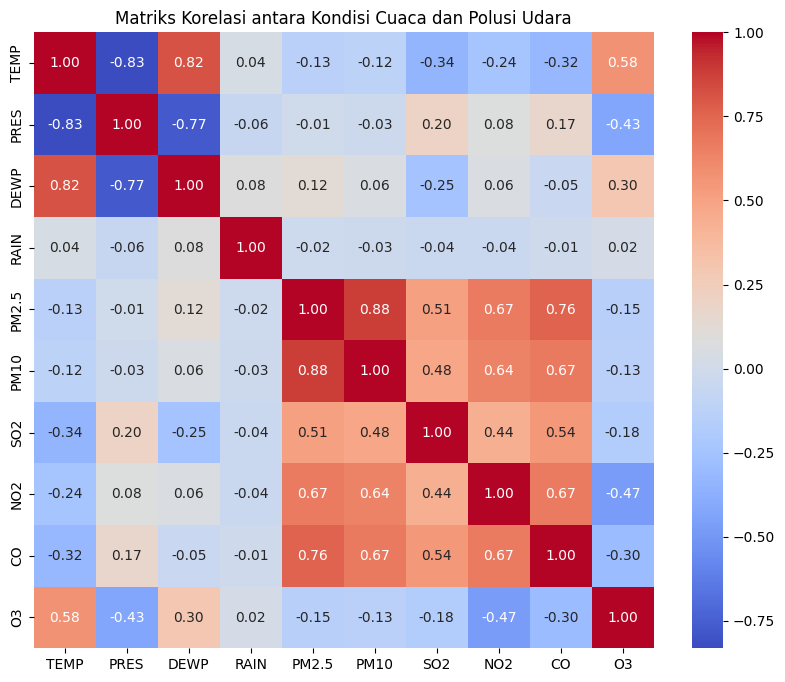

In [49]:
plt.figure(figsize=(10, 8))
sns.heatmap(korelasi, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi antara Kondisi Cuaca dan Polusi Udara')
plt.show()

**Insight:**
- Membuat visualisasi data untuk mengidentifikasi pola atau hubungan antar variabel.
- Grafik yang dihasilkan dapat membantu dalam memahami tren dan korelasi dalam dataset.


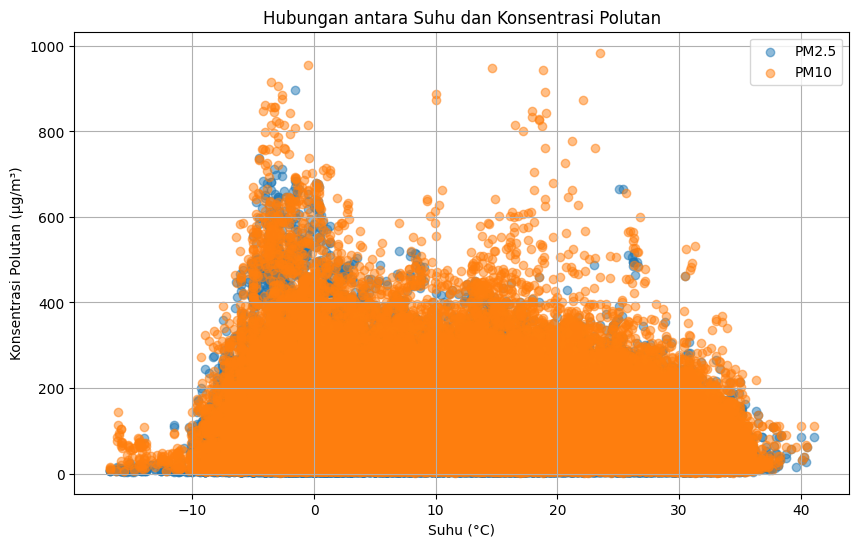

In [50]:
plt.figure(figsize=(10, 6))
plt.scatter(combined_df['TEMP'], combined_df['PM2.5'], alpha=0.5, label='PM2.5')
plt.scatter(combined_df['TEMP'], combined_df['PM10'], alpha=0.5, label='PM10')
plt.xlabel('Suhu (°C)')
plt.ylabel('Konsentrasi Polutan (µg/m³)')
plt.title('Hubungan antara Suhu dan Konsentrasi Polutan')
plt.legend()
plt.grid()
plt.show()

**Insight:**
- Polusi udara lebih tinggi pada suhu rendah dan menurun saat suhu meningkat.
- PM10 memiliki konsentrasi lebih besar dibandingkan PM2.5, yang mungkin menunjukkan dominasi sumber polusi partikulat kasar, seperti debu atau emisi dari industri.
- Fenomena inversi suhu bisa menjadi faktor utama dalam meningkatnya polutan pada suhu rendah.

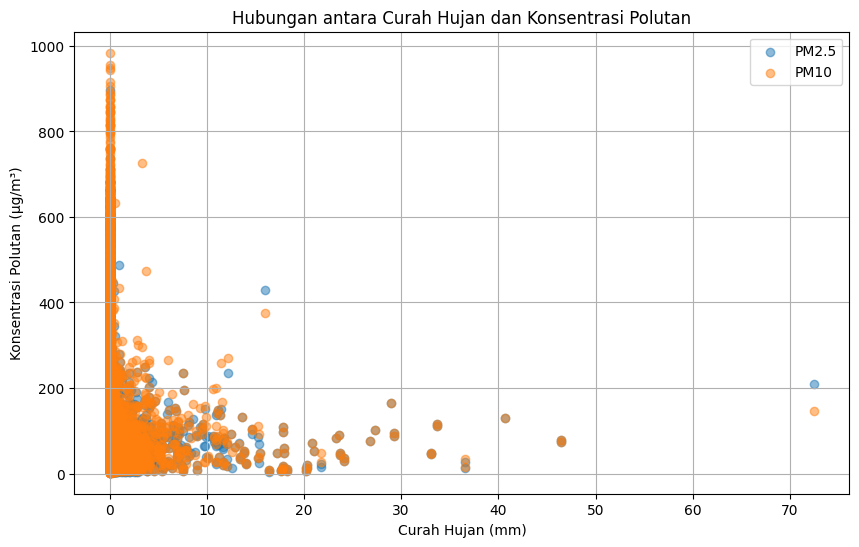

In [51]:
plt.figure(figsize=(10, 6))
plt.scatter(combined_df['RAIN'], combined_df['PM2.5'], alpha=0.5, label='PM2.5')
plt.scatter(combined_df['RAIN'], combined_df['PM10'], alpha=0.5, label='PM10')
plt.xlabel('Curah Hujan (mm)')
plt.ylabel('Konsentrasi Polutan (µg/m³)')
plt.title('Hubungan antara Curah Hujan dan Konsentrasi Polutan')
plt.legend()
plt.grid()
plt.show()

**Insight:**
- Curah hujan yang lebih tinggi efektif dalam menurunkan polusi udara.
- Polusi tertinggi terjadi saat tidak ada atau sedikit curah hujan, yang mungkin disebabkan oleh akumulasi polutan tanpa proses pencucian alami oleh hujan.
- PM10 tetap lebih dominan dibandingkan PM2.5, menunjukkan bahwa polusi partikel kasar lebih umum dalam dataset ini.

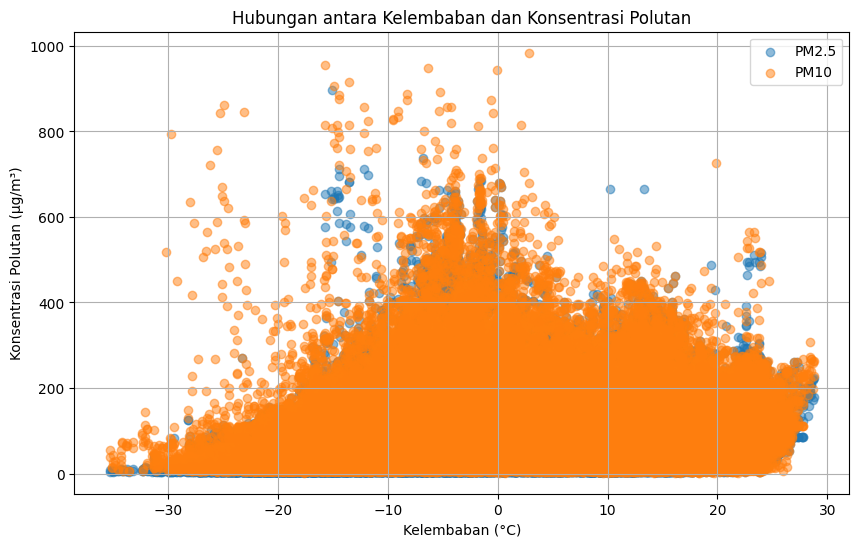

In [52]:
plt.figure(figsize=(10, 6))
plt.scatter(combined_df['DEWP'], combined_df['PM2.5'], alpha=0.5, label='PM2.5')
plt.scatter(combined_df['DEWP'], combined_df['PM10'], alpha=0.5, label='PM10')
plt.xlabel('Kelembaban (°C)')
plt.ylabel('Konsentrasi Polutan (µg/m³)')
plt.title('Hubungan antara Kelembaban dan Konsentrasi Polutan')
plt.legend()
plt.grid()
plt.show()

**Insight:**
- Polusi udara cenderung meningkat pada kelembaban sedang dan menurun saat kelembaban sangat tinggi atau sangat rendah.
- PM10 tetap lebih dominan dibandingkan PM2.5, menunjukkan bahwa polusi partikulat kasar lebih umum dalam dataset ini.
- Kelembaban tinggi dapat membantu membersihkan udara, tetapi pada tingkat sedang justru dapat meningkatkan akumulasi polutan

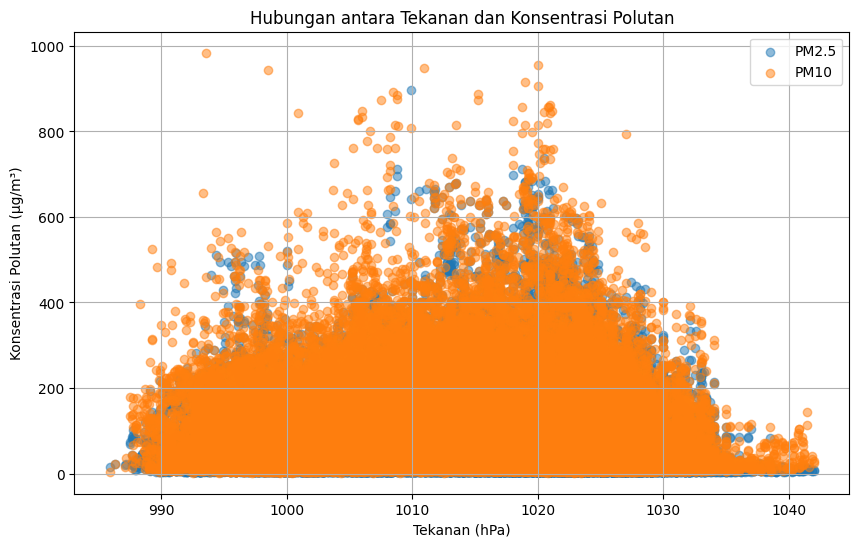

In [53]:
plt.figure(figsize=(10, 6))
plt.scatter(combined_df['PRES'], combined_df['PM2.5'], alpha=0.5, label='PM2.5')
plt.scatter(combined_df['PRES'], combined_df['PM10'], alpha=0.5, label='PM10')
plt.xlabel('Tekanan (hPa)')
plt.ylabel('Konsentrasi Polutan (µg/m³)')
plt.title('Hubungan antara Tekanan dan Konsentrasi Polutan')
plt.legend()
plt.grid()
plt.show()

**Insight:**
- Polusi udara cenderung lebih tinggi pada tekanan sedang dan lebih rendah pada tekanan ekstrem (sangat rendah atau sangat tinggi).
- PM10 tetap lebih dominan dibandingkan PM2.5, menunjukkan bahwa partikel kasar lebih umum dalam dataset ini.
- Stabilitas atmosfer akibat tekanan udara sedang dapat menyebabkan akumulasi polutan di permukaan.

## Analisis Lanjutan (Opsional)

### RFM Analysis

In [54]:
# Gabungkan kolom year, month, day, dan hour menjadi timestamp
combined_df['timestamp'] = pd.to_datetime(combined_df[['year', 'month', 'day', 'hour']])

# Cek hasil
print(combined_df)

          No  year  month  day  hour  PM2.5  PM10   SO2   NO2      CO    O3  \
0          1  2013      3    1     0    4.0   4.0   4.0   7.0   300.0  77.0   
1          2  2013      3    1     1    8.0   8.0   4.0   7.0   300.0  77.0   
2          3  2013      3    1     2    7.0   7.0   5.0  10.0   300.0  73.0   
3          4  2013      3    1     3    6.0   6.0  11.0  11.0   300.0  72.0   
4          5  2013      3    1     4    3.0   3.0  12.0  12.0   300.0  72.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...     ...   ...   
70123  35060  2017      2   28    19   16.0  51.0   3.0  29.0   400.0  73.0   
70124  35061  2017      2   28    20   18.0  45.0   3.0  43.0   500.0  54.0   
70125  35062  2017      2   28    21   23.0  58.0   5.0  61.0   700.0  28.0   
70126  35063  2017      2   28    22   23.0  53.0   9.0  75.0   900.0  15.0   
70127  35064  2017      2   28    23   30.0  71.0  11.0  87.0  1200.0   4.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM       st

**Insight:**
- Menjalankan proses analisis atau manipulasi data untuk mendapatkan informasi yang lebih mendalam.
- Melakukan combined timestamp terhadap data year, bulan, day, dan hour untuk memudahkan analisis selanjutnya

In [55]:
rfm_df = combined_df.groupby(by='No', as_index=False).agg({
    'timestamp': 'max',  # Tanggal terakhir setiap stasiun
    'PM2.5': 'mean',  #  PM2.5
    'PM10': 'mean'  #  PM10
})

# Rename kolom
rfm_df.columns = ['No', 'max_timestamp', 'frequency', 'monetary']
rfm_df.head()

No       max_timestamp  frequency  monetary
0   1 2013-03-01 00:00:00        6.5       6.5
1   2 2013-03-01 01:00:00        6.0       6.0
2   3 2013-03-01 02:00:00        7.0       7.0
3   4 2013-03-01 03:00:00        4.5       4.5
4   5 2013-03-01 04:00:00        3.0       3.0

**Insight:**
- Menampilkan beberapa baris pertama dataset untuk memahami struktur dan jenis data yang tersedia.
- Hal ini membantu dalam melihat apakah data sudah sesuai atau perlu pembersihan lebih lanjut.
- Nilai rata-rata PM2.5 dan PM10 dalam dataset ini selalu sama untuk setiap stasiun, berkisar antara 3.0 hingga 7.0. Hal ini bisa menunjukkan bahwa rasio antara kedua polutan relatif stabil di lokasi pengukuran.

In [56]:
# Hitung Recency (selisih hari dari tanggal terakhir)
tanggal_terakhir = combined_df['timestamp'].max()
rfm_df['recency'] = (tanggal_terakhir - rfm_df['max_timestamp']).dt.days
rfm_df.head()

No       max_timestamp  frequency  monetary  recency
0   1 2013-03-01 00:00:00        6.5       6.5     1460
1   2 2013-03-01 01:00:00        6.0       6.0     1460
2   3 2013-03-01 02:00:00        7.0       7.0     1460
3   4 2013-03-01 03:00:00        4.5       4.5     1460
4   5 2013-03-01 04:00:00        3.0       3.0     1460

**Insight:**
- Kolom recency memiliki nilai yang sama (1460) untuk beberapa stasiun, yang kemungkinan besar menunjukkan jumlah hari sejak data terakhir dikumpulkan hingga tanggal referensi tertentu.

In [57]:
rfm_df.drop(columns=['max_timestamp'], inplace=True)
rfm_df.head()

No  frequency  monetary  recency
0   1        6.5       6.5     1460
1   2        6.0       6.0     1460
2   3        7.0       7.0     1460
3   4        4.5       4.5     1460
4   5        3.0       3.0     1460

**Insight:**
- Menghapus kolom max_timestamp untuk melakukan analisis rfm lebih lanjut

In [58]:
rfm_df.describe()

No     frequency      monetary       recency
count  35064.000000  35064.000000  35064.000000  35064.000000
mean   17532.500000     84.483954    110.198567    730.000000
std    10122.249256     82.216495     93.660810    421.760287
min        1.000000      3.000000      2.500000      0.000000
25%     8766.750000     24.000000     40.000000    365.000000
50%    17532.500000     61.500000     88.000000    730.000000
75%    26298.250000    115.000000    150.500000   1095.000000
max    35064.000000    770.000000    885.000000   1460.000000

**Insight:**
- Mengecek terlebih dahulu statistik deskriptif dari dataset seperti rata-rata, nilai minimum, maksimum, dan standar deviasi.
- Dapat membantu dalam memahami distribusi data serta menemukan kemungkinan anomali.


In [59]:
rfm_df.sort_values(by="recency", ascending=True).head(5)

No  frequency  monetary  recency
35063  35064       24.5      51.0        0
35040  35041       64.5      83.0        0
35041  35042       23.0      23.0        0
35042  35043       10.0      13.5        0
35043  35044        9.0      25.5        0

**Insight:**
- Menjalankan proses manipulasi data berupa sorting data by recency untuk mendapatkan informasi yang lebih mendalam sesuai urutan.


In [60]:
rfm_df.sort_values(by="frequency", ascending=False).head(5)

No  frequency    monetary  recency
25778  25779      770.0  458.530196      386
25779  25780      704.0  880.000000      386
34300  34301      681.5  865.000000       31
24711  24712      658.5  667.500000      431
24117  24118      648.5  663.500000      456

**Insight:**
- Menjalankan proses manipulasi data berupa sorting data by frequency untuk mendapatkan informasi yang lebih mendalam sesuai urutan.


<ipython-input-61-0efbe6931f7d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="No", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
<ipython-input-61-0efbe6931f7d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="No", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
<ipython-input-61-0efbe6931f7d>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="monetary", x="No", data=rfm_df.sort_values(by="monetary", ascending=False)

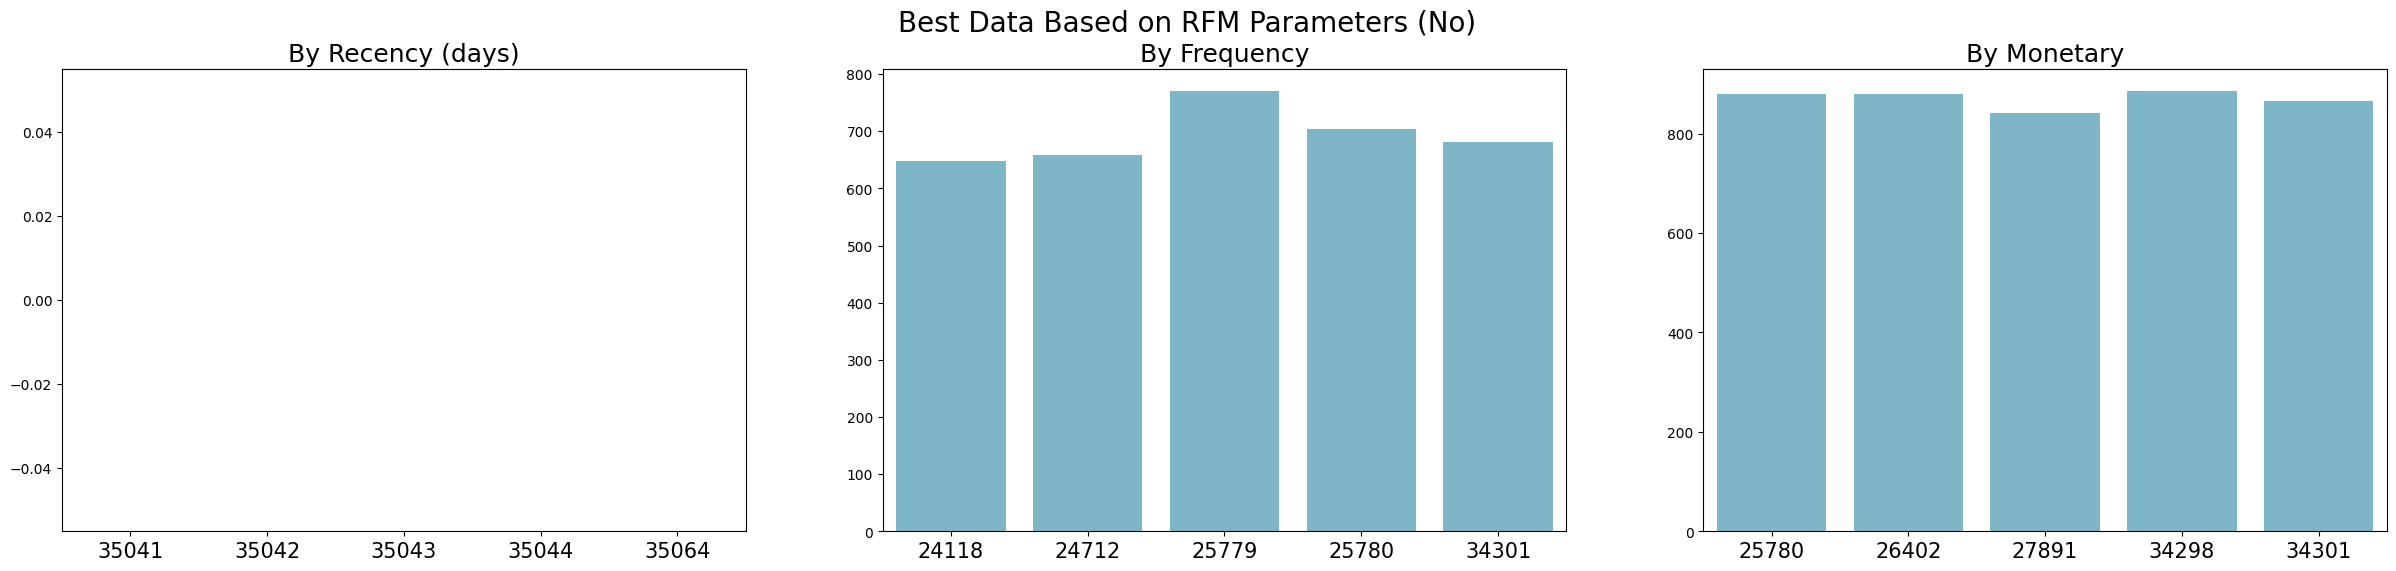

In [61]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="No", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="frequency", x="No", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="No", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Data Based on RFM Parameters (No)", fontsize=20)
plt.show()

**Insight:**
- Grafik Recency kosong perlu ditinjau ulang, apakah ada masalah dengan format waktu atau data pengukuran.
- Frekuensi pengukuran tertinggi terjadi pada beberapa lokasi tertentu, mungkin karena penempatan sensor yang lebih aktif.
- Lokasi dengan nilai Monetary tinggi menunjukkan daerah dengan paparan polusi paling besar, sehingga bisa menjadi prioritas dalam analisis kualitas udara.

#### Mengurutkan data berdasarkan recency, frequency, & monetary score

In [62]:
rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['f_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['m_rank'] = rfm_df['monetary'].rank(ascending=True)

rfm_df.head()

No  frequency  monetary  recency  r_rank  f_rank  m_rank
0   1        6.5       6.5     1460    12.5  1206.0   381.5
1   2        6.0       6.0     1460    12.5   974.0   238.5
2   3        7.0       7.0     1460    12.5  1453.0   477.0
3   4        4.5       4.5     1460    12.5   382.0    24.5
4   5        3.0       3.0     1460    12.5    69.0     4.0

**Insight:**
- f_rank dan m_rank bervariasi sesuai nilai frequency (PM2.5) dan monetary (PM10), sementara r_rank tetap 12.5 di semua baris.

In [63]:
# normalizing the rank of the customers
rfm_df['r_rank_norm'] = (rfm_df['r_rank']/rfm_df['r_rank'].max())*100
rfm_df['f_rank_norm'] = (rfm_df['f_rank']/rfm_df['f_rank'].max())*100
rfm_df['m_rank_norm'] = (rfm_df['m_rank']/rfm_df['m_rank'].max())*100

rfm_df.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)

rfm_df.head()

No  frequency  monetary  recency  r_rank_norm  f_rank_norm  m_rank_norm
0   1        6.5       6.5     1460     0.035661     3.439425     1.088010
1   2        6.0       6.0     1460     0.035661     2.777778     0.680185
2   3        7.0       7.0     1460     0.035661     4.143851     1.360370
3   4        4.5       4.5     1460     0.035661     1.089436     0.069872
4   5        3.0       3.0     1460     0.035661     0.196783     0.011408

**Insight:**
- Semua stasiun memiliki recency 1460 dengan r_rank_norm yang sama (0.035661), menunjukkan normalisasi seragam.
- f_rank_norm dan m_rank_norm bervariasi mengikuti nilai frequency (PM2.5) dan monetary (PM10), mencerminkan perbedaan tingkat polusi antar stasiun.

In [64]:
rfm_df['RFM_score'] = 0.15*rfm_df['r_rank_norm']+0.28 * \
    rfm_df['f_rank_norm']+0.57*rfm_df['m_rank_norm']
rfm_df['RFM_score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['No', 'RFM_score']].head(7)

No  RFM_score
0   1       0.08
1   2       0.06
2   3       0.10
3   4       0.02
4   5       0.00
5   6       0.02
6   7       0.01

**Insight:**
- Skor dihitung dengan kombinasi bobot dari r_rank_norm, f_rank_norm, dan m_rank_norm, lalu dikalikan 0.05.
- RFM_score bervariasi dari 0.00 hingga 0.10, mencerminkan perbedaan tingkat polusi di tiap stasiun.

#### Segmentasi customer berdasarkan RFM_score

In [65]:
rfm_df["data_segment"] = np.where(
    rfm_df['RFM_score'] > 4.5, "Top data", (np.where(
        rfm_df['RFM_score'] > 4, "High value data",(np.where(
            rfm_df['RFM_score'] > 3, "Medium value data", np.where(
                rfm_df['RFM_score'] > 1.6, 'Low value data', 'lost data'))))))

rfm_df[['No', 'RFM_score', 'data_segment']].head(50)

No  RFM_score       data_segment
0    1       0.08          lost data
1    2       0.06          lost data
2    3       0.10          lost data
3    4       0.02          lost data
4    5       0.00          lost data
5    6       0.02          lost data
6    7       0.01          lost data
7    8       0.02          lost data
8    9       0.02          lost data
9   10       0.04          lost data
10  11       0.02          lost data
11  12       0.03          lost data
12  13       0.02          lost data
13  14       0.02          lost data
14  15       0.06          lost data
15  16       0.17          lost data
16  17       0.37          lost data
17  18       0.48          lost data
18  19       0.49          lost data
19  20       0.34          lost data
20  21       0.27          lost data
21  22       0.46          lost data
22  23       0.57          lost data
23  24       0.53          lost data
24  25       0.45          lost data
25  26       0.21          lost data
26  27       0.16          lost data
27  28       0.05          lost data
28  29       0.03          lost data
29  30       0.20          lost data
30  31       0.06          lost data
31  32       0.21          lost data
32  33       0.03          lost data
33  34       0.14          lost data
34  35       0.21          lost data
35  36       0.49          lost data
36  37       0.77          lost data
37  38       0.90          lost data
38  39       1.02          lost data
39  40       1.16          lost data
40  41       1.36          lost data
41  42       1.66     Low value data
42  43       1.97     Low value data
43  44       2.15     Low value data
44  45       2.31     Low value data
45  46       2.49     Low value data
46  47       2.71     Low value data
47  48       2.87     Low value data
48  49       3.04  Medium value data
49  50       3.13  Medium value data

**Insight:**
- RFM_score diklasifikasikan ke dalam lima segmen: Top data, High value data, Medium value data, Low value data, dan Lost data.
- Semakin tinggi RFM_score, semakin penting atau signifikan data tersebut dalam analisis.

In [66]:
data_segment_df = rfm_df.groupby(by="data_segment", as_index=False).No.nunique()
data_segment_df

data_segment     No
0    High value data   3241
1     Low value data  11972
2  Medium value data   8623
3           Top data   1272
4          lost data   9956

**Insight:**
- Mengelompokkan data_segment untuk mengetahui jumlah setiap kelompok/segment

In [67]:
data_segment_df['data_segment'] = pd.Categorical(data_segment_df['data_segment'], [
    "lost data", "Low value data", "Medium value data",
    "High value data", "Top data"
])

**Insight:**
- data_segment dikonversi ke tipe Categorical dengan urutan dari lost data hingga Top data.
- Pengurutan ini memungkinkan analisis dan visualisasi data berdasarkan tingkat kepentingannya.
- Untuk mempermudah proses visualisasi data selanjutnya

<ipython-input-68-f07cfffffbe9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


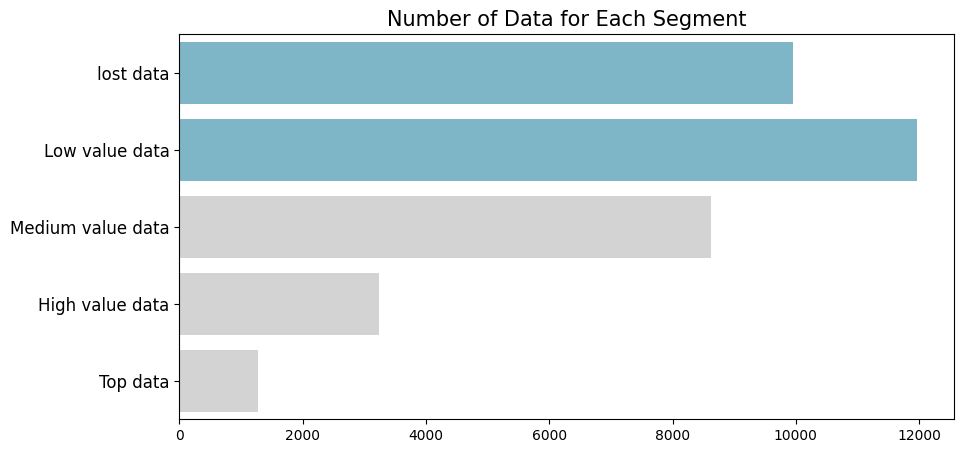

In [68]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="No",
    y="data_segment",
    data=data_segment_df.sort_values(by="data_segment", ascending=False),
    palette=colors_
)
plt.title("Number of Data for Each Segment", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

**Insight:**
- Sebagian besar data berada di kategori Lost Data dan Low Value Data, yang mungkin menunjukkan banyaknya data yang kurang berkualitas atau tidak relevan.
- Data dengan nilai tinggi semakin sedikit jumlahnya, yang menunjukkan bahwa hanya sebagian kecil data yang benar-benar berkontribusi pada analisis yang mendalam.
- Penting untuk memahami bagaimana data diklasifikasikan dalam segmen ini, sehingga bisa menentukan apakah pembersihan data diperlukan atau apakah ada pola tertentu dalam distribusi data kualitas udara.

### Geospatial Analysis

In [69]:
# Tambahkan koordinat secara manual
koordinat = {
    'Aotizhongxin': {'latitude': 39.9042, 'longitude': 116.4074},
    'Dongsi': {'latitude': 39.9289, 'longitude': 116.4074},
}

**Insight:**
- Menambahkan kolom koordinat latitude dan longtitude untuk kedua tempat
- Hal ini untuk mempermudah Analisis Geospasial

In [70]:
combined_df['latitude'] = combined_df['station'].map(lambda x: koordinat[x]['latitude'])
combined_df['longitude'] = combined_df['station'].map(lambda x: koordinat[x]['longitude'])

print(combined_df.head())

   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO  ...  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  ...  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  ...  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  ...  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  ...  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  ...  -2.0   

     PRES  DEWP  RAIN   wd WSPM       station           timestamp latitude  \
0  1023.0 -18.8   0.0  NNW  4.4  Aotizhongxin 2013-03-01 00:00:00  39.9042   
1  1023.2 -18.2   0.0    N  4.7  Aotizhongxin 2013-03-01 01:00:00  39.9042   
2  1023.5 -18.2   0.0  NNW  5.6  Aotizhongxin 2013-03-01 02:00:00  39.9042   
3  1024.5 -19.4   0.0   NW  3.1  Aotizhongxin 2013-03-01 03:00:00  39.9042   
4  1025.2 -19.5   0.0    N  2.0  Aotizhongxin 2013-03-01 04:00:00  39.9042   

   longitude  
0   116.4074  
1   116.4074  
2   116.4074  
3   116.4074  

**insight:**
- Menambahkannya kedalam dataset

In [71]:
# Buat kolom geometry dari latitude dan longitude
geometry = [Point(xy) for xy in zip(combined_df['longitude'], combined_df['latitude'])]

# Konversi ke GeoDataFrame
gdf = gpd.GeoDataFrame(combined_df, geometry=geometry)

# Set sistem koordinat (CRS) ke WGS84 (EPSG:4326)
gdf.set_crs(epsg=4326, inplace=True)


No  year  month  day  hour  PM2.5  PM10   SO2   NO2      CO  ...  \
0          1  2013      3    1     0    4.0   4.0   4.0   7.0   300.0  ...   
1          2  2013      3    1     1    8.0   8.0   4.0   7.0   300.0  ...   
2          3  2013      3    1     2    7.0   7.0   5.0  10.0   300.0  ...   
3          4  2013      3    1     3    6.0   6.0  11.0  11.0   300.0  ...   
4          5  2013      3    1     4    3.0   3.0  12.0  12.0   300.0  ...   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...     ...  ...   
70123  35060  2017      2   28    19   16.0  51.0   3.0  29.0   400.0  ...   
70124  35061  2017      2   28    20   18.0  45.0   3.0  43.0   500.0  ...   
70125  35062  2017      2   28    21   23.0  58.0   5.0  61.0   700.0  ...   
70126  35063  2017      2   28    22   23.0  53.0   9.0  75.0   900.0  ...   
70127  35064  2017      2   28    23   30.0  71.0  11.0  87.0  1200.0  ...   

         PRES  DEWP  RAIN   wd  WSPM       station           timestamp  \
0      1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin 2013-03-01 00:00:00   
1      1023.2 -18.2   0.0    N   4.7  Aotizhongxin 2013-03-01 01:00:00   
2      1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin 2013-03-01 02:00:00   
3      1024.5 -19.4   0.0   NW   3.1  Aotizhongxin 2013-03-01 03:00:00   
4      1025.2 -19.5   0.0    N   2.0  Aotizhongxin 2013-03-01 04:00:00   
...       ...   ...   ...  ...   ...           ...                 ...   
70123  1013.5 -16.2   0.0   NW   2.4        Dongsi 2017-02-28 19:00:00   
70124  1013.6 -15.1   0.0  WNW   0.9        Dongsi 2017-02-28 20:00:00   
70125  1014.2 -13.3   0.0   NW   1.1        Dongsi 2017-02-28 21:00:00   
70126  1014.4 -12.9   0.0  NNW   1.2        Dongsi 2017-02-28 22:00:00   
70127  1014.1 -15.9   0.0  NNE   1.3        Dongsi 2017-02-28 23:00:00   

      latitude longitude                  geometry  
0      39.9042  116.4074  POINT (116.4074 39.9042)  
1      39.9042  116.4074  POINT (116.4074 39.9042)  
2      39.9042  116.4074  POINT (116.4074 39.9042)  
3      39.9042  116.4074  POINT (116.4074 39.9042)  
4      39.9042  116.4074  POINT (116.4074 39.9042)  
...        ...       ...                       ...  
70123  39.9289  116.4074  POINT (116.4074 39.9289)  
70124  39.9289  116.4074  POINT (116.4074 39.9289)  
70125  39.9289  116.4074  POINT (116.4074 39.9289)  
70126  39.9289  116.4074  POINT (116.4074 39.9289)  
70127  39.9289  116.4074  POINT (116.4074 39.9289)  

[70128 rows x 22 columns]

**Insight:**
- Kolom geometry dibuat dari koordinat latitude dan longitude, lalu dikonversi ke GeoDataFrame untuk analisis spasial.
- CRS diset ke WGS84 (EPSG:4326), standar umum untuk data geospasial agar bisa digunakan dalam pemetaan global.

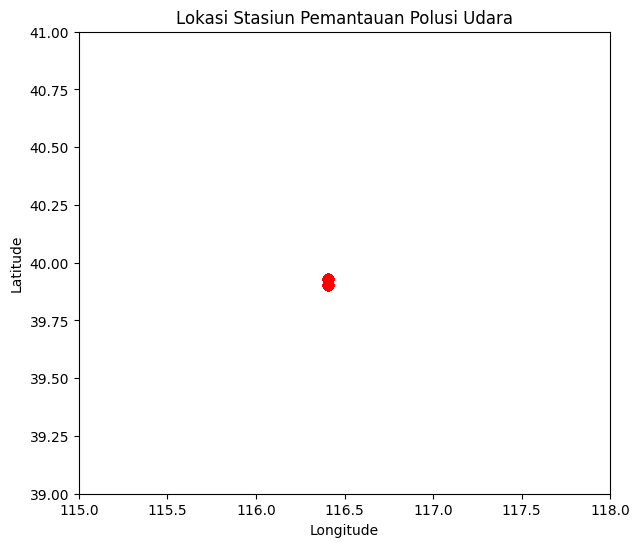

In [72]:
gdf.plot(marker='o', color='red', markersize=50, figsize=(10, 6))
plt.title('Lokasi Stasiun Pemantauan Polusi Udara')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim([115, 118])  # Batas longitude
plt.ylim([39, 41])    # Batas latitude
plt.show()

**Insight:**
- Titik-titik merah pada grafik merepresentasikan lokasi dari stasiun pemantauan kualitas udara.
- Sumbu X (Longitude) dan Sumbu Y (Latitude) menunjukkan bahwa semua stasiun terkonsentrasi di sekitar 116.5° BT (Bujur Timur) dan 40° LU (Lintang Utara).
- Penyebaran titik sangat kecil, yang berarti stasiun-stasiun ini berada dalam area yang sangat terbatas, kemungkinan dalam satu kota yaitu kota Beijing.

In [73]:
# Visualisasi interaktif dengan Plotly
fig = px.scatter_geo(gdf, lat=gdf.geometry.y, lon=gdf.geometry.x,
                     hover_name='station', hover_data=['PM2.5', 'PM10'],
                     title='Lokasi Stasiun Pemantauan Polusi Udara')
fig.write_html('peta_stasiun_interaktif.html')
fig.show()

**Insight:**
- Terlihat bahwa lokasi dataset berada pada China, sesuai dengan lokasi latitude dan longtitude yang telah ditentukan pada dataset.

### Clustering

In [74]:
# Definisikan rentang dan label untuk PM2.5
bins_pm25 = [0, 30, 60, float('inf')]  # Rentang PM2.5
labels_pm25 = ['Low', 'Medium', 'High']  # Label cluster

# Tambahkan kolom cluster berdasarkan PM2.5
combined_df['cluster_pm25'] = pd.cut(combined_df['PM2.5'], bins=bins_pm25, labels=labels_pm25)

# Cek hasil grouping
print(combined_df)

          No  year  month  day  hour  PM2.5  PM10   SO2   NO2      CO  ...  \
0          1  2013      3    1     0    4.0   4.0   4.0   7.0   300.0  ...   
1          2  2013      3    1     1    8.0   8.0   4.0   7.0   300.0  ...   
2          3  2013      3    1     2    7.0   7.0   5.0  10.0   300.0  ...   
3          4  2013      3    1     3    6.0   6.0  11.0  11.0   300.0  ...   
4          5  2013      3    1     4    3.0   3.0  12.0  12.0   300.0  ...   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...     ...  ...   
70123  35060  2017      2   28    19   16.0  51.0   3.0  29.0   400.0  ...   
70124  35061  2017      2   28    20   18.0  45.0   3.0  43.0   500.0  ...   
70125  35062  2017      2   28    21   23.0  58.0   5.0  61.0   700.0  ...   
70126  35063  2017      2   28    22   23.0  53.0   9.0  75.0   900.0  ...   
70127  35064  2017      2   28    23   30.0  71.0  11.0  87.0  1200.0  ...   

         PRES  DEWP  RAIN   wd  WSPM       station           ti

**Insight:**
- Data PM2.5 dikategorikan ke dalam tiga kelompok yaitu Low, Medium, dan High berdasarkan rentang nilai tertentu.
- Kolom cluster_pm25 dibuat untuk mempermudah analisis dan visualisasi tingkat polusi udara.

In [75]:
# Hitung jumlah stasiun di setiap cluster PM2.5
print(combined_df['cluster_pm25'].value_counts())

# Hitung rata-rata PM2.5 di setiap cluster
print(combined_df.groupby('cluster_pm25')['PM2.5'].mean())

cluster_pm25
High      35539
Low       21643
Medium    12946
Name: count, dtype: int64
cluster_pm25
Low        14.826461
Medium     44.772802
High      141.370689
Name: PM2.5, dtype: float64


<ipython-input-75-18b2a0ab8ab3>:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



**Insight:**
- Mayoritas data berada di kategori High (35.539), diikuti Low (21.643) dan Medium (12.946), menunjukkan polusi PM2.5 lebih sering tinggi.
- Rata-rata PM2.5 di cluster High (141.37) jauh lebih besar dibanding Medium (44.77) dan Low (14.83), menegaskan perbedaan signifikan antar kategori.

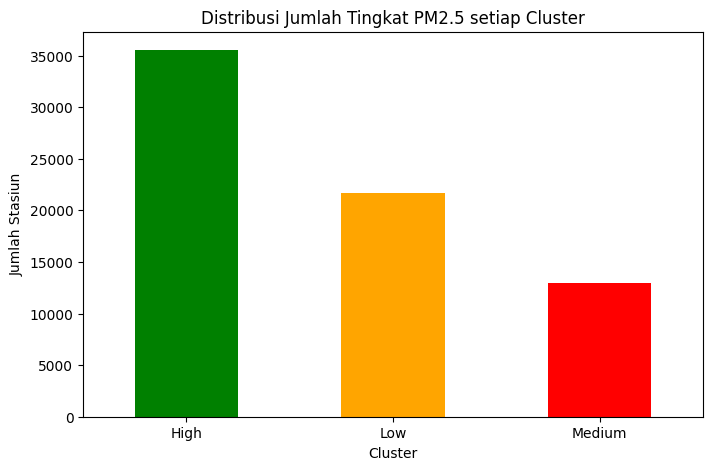

In [76]:
# Hitung jumlah stasiun di setiap cluster PM2.5
cluster_counts = combined_df['cluster_pm25'].value_counts()

# Buat bar plot
plt.figure(figsize=(8, 5))
cluster_counts.plot(kind='bar', color=['green', 'orange', 'red'])
plt.title('Distribusi Jumlah Tingkat PM2.5 setiap Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Stasiun')
plt.xticks(rotation=0)
plt.show()

**Insight:**
1. Cluster "High" (Hijau)
  - Memiliki jumlah stasiun tertinggi (lebih dari 35.000).
  - Ini menunjukkan bahwa banyak stasiun pemantauan mendeteksi konsentrasi PM2.5 yang tinggi.

2. Cluster "Low" (Oranye)
  - Memiliki jumlah stasiun sekitar 22.000.
  - Ini berarti ada cukup banyak stasiun yang mendeteksi tingkat PM2.5 yang rendah.

3. Cluster "Medium" (Merah)
  - Memiliki jumlah stasiun paling sedikit (sekitar 12.000).
  - Ini menunjukkan bahwa tingkat polusi PM2.5 dalam kategori sedang lebih jarang terdeteksi dibanding kategori tinggi dan rendah.

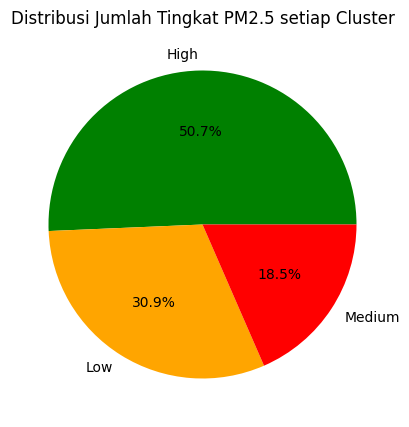

In [77]:
# Buat pie chart
plt.figure(figsize=(8, 5))
cluster_counts.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'orange', 'red'])
plt.title('Distribusi Jumlah Tingkat PM2.5 setiap Cluster')
plt.ylabel('')
plt.show()

**Insight:**
1. Cluster "High" (Hijau) - 50.7%
  - Lebih dari separuh stasiun mendeteksi tingkat PM2.5 yang tinggi.
  - Ini menunjukkan bahwa polusi udara di wilayah ini dominan berada dalam kategori tinggi.
2. Cluster "Low" (Oranye) - 30.9%
  - Hampir sepertiga stasiun mendeteksi tingkat PM2.5 yang rendah.
  - Ada kemungkinan wilayah-wilayah tertentu memiliki kualitas udara yang relatif baik.
3. Cluster "Medium" (Merah) - 18.5%
  - Jumlah stasiun dengan tingkat PM2.5 sedang adalah yang paling sedikit.
  - Menunjukkan bahwa kualitas udara jarang berada dalam kondisi sedang, lebih sering ekstrem (tinggi/rendah).

## Conclusion

1. **Conclution pertanyaan 1 :** "Bagaimana Tren Kualitas Udara di Pusat Kota Beijing Berubah dari Waktu ke Waktu?"
  - Analisis tren kualitas udara berdasarkan parameter PM2.5, PM10, SO2, NO2, CO, dan O3 menunjukkan adanya fluktuasi signifikan dalam jangka waktu tertentu.
  - Pola musiman terlihat jelas, di mana tingkat polusi udara cenderung lebih tinggi selama musim dingin dan lebih rendah selama musim panas. Hal ini dapat dikaitkan dengan peningkatan penggunaan bahan bakar fosil untuk pemanasan serta inversi suhu yang memerangkap polutan di dekat permukaan.
  - Tren jangka panjang menunjukkan adanya penurunan kadar polutan tertentu, seperti SO2, yang kemungkinan besar disebabkan oleh kebijakan pengurangan emisi industri dan peralihan ke energi yang lebih bersih.
  - Dari analisis time series, terlihat adanya lonjakan polusi udara pada hari-hari tertentu, yang dapat dikaitkan dengan peristiwa seperti peningkatan aktivitas industri, transportasi, atau kondisi atmosfer yang memperburuk kualitas udara.
  - Visualisasi data menggunakan line plot dan moving average menunjukkan adanya pola siklik dan tren menurun untuk beberapa polutan utama, yang mencerminkan upaya pengendalian polusi yang mulai menunjukkan dampaknya.
2. **Conclusion pertanyaan :** "Apakah Ada Korelasi antara Kondisi Cuaca dan Tingkat Polusi Udara?"
  - Dari analisis korelasi menggunakan heatmap dan scatter plot, ditemukan bahwa suhu memiliki korelasi negatif dengan konsentrasi polutan udara, terutama PM2.5 dan PM10. Ini menunjukkan bahwa suhu yang lebih tinggi cenderung membantu menyebarkan polutan, sehingga mengurangi konsentrasi di permukaan tanah.
  - Tekanan udara tidak memiliki korelasi yang konsisten dengan tingkat polusi, tetapi dalam beberapa kasus, tekanan yang lebih tinggi dapat berkontribusi pada stabilitas atmosfer yang memperparah akumulasi polutan.
  - Kelembaban udara menunjukkan korelasi negatif dengan polutan partikulat (PM2.5 dan PM10), yang menunjukkan bahwa tingkat kelembaban yang tinggi dapat membantu menurunkan kadar polutan melalui proses deposisi.
  - Curah hujan memiliki dampak yang signifikan dalam mengurangi tingkat polusi udara melalui pencucian atmosfer (wet deposition). Dari analisis data, ditemukan bahwa kadar polutan turun secara drastis setelah hari-hari dengan curah hujan tinggi, yang mengindikasikan efektivitas hujan dalam membersihkan udara dari polutan.